# Sprint 6 Tienda de Videojuegos


## Descripción del proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# Pasos el proyecto
## Paso 1. Abre el archivo de datos y estudia la información general 

games.csv .

## Paso 2. Prepara los datos

Reemplaza los nombres de las columnas (ponlos en minúsculas).
Convierte los datos en los tipos necesarios.
Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
Si es necesario, elige la manera de tratar los valores ausentes:
Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.
## Paso 3. Analiza los datos

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?
## Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales. Explica la diferencia.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
## Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

## Paso 6. Escribe una conclusión general

# Descripción de datos
— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)

# Paso 1. Carga de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df=pd.read_csv('games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

encontramos que el año de lanzamiento es de tipo flotante se tendra que cambiar a entero ,de igual forma el puntaje de la critica,

In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

# Paso 2. Preparacion de los datos

Reemplaza los nombres de las columnas (ponlos en minúsculas)

In [8]:
df.columns=df.columns.str.lower()

In [9]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
#Tratamiento valores TBD
df['user_score'] = pd.to_numeric(df['user_score'].replace('TBD', pd.NA), errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


## Valores ausentes

In [12]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [13]:
df.isna().sum()*100/len(df)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

In [14]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
# Eliminar filas específicas del DataFrame df
df.drop([659, 14244], inplace=True)

# Restablecer el índice del DataFrame games
df.reset_index(inplace=True, drop=True)


In [16]:

df[df['year_of_release'].isna()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Notamos que algunos juegos tienen la fecha de salida en el nombre por lo que procedemos a obtener este valor


In [17]:

years=df[df['year_of_release'].isna()]
years['name']

183                        Madden NFL 2004
377                       FIFA Soccer 2004
456             LEGO Batman: The Videogame
475             wwe Smackdown vs. Raw 2006
609                         Space Invaders
                       ...                
16371    PDC World Championship Darts 2008
16403                        Freaky Flyers
16446                            Inversion
16456          Hakuouki: Shinsengumi Kitan
16520                         Virtua Quest
Name: name, Length: 269, dtype: object

In [18]:
# Función para extraer el año 
def extraer_año(texto):
    palabras = texto.split()  # Dividimos
    for palabra in palabras:
        if palabra.isdigit() and len(palabra) == 4:  # Verificar si la palabra es un número de cuatro dígitos
            año = int(palabra)
            if 1900 <= año <= 2024:  # Verificar si el número es un año válido
                return año
    return None  # Devolver None si no se encuentra un año


df['año_extraido'] = df['name'].apply(extraer_año)




In [19]:
df[df['año_extraido'].isna()==False].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,año_extraido
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004.0
238,Madden NFL 2005,PS2,2004.0,Sports,4.18,0.26,0.01,0.08,91.0,7.9,E,2005.0
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,0.10,2.39,1.05,0.86,86.0,8.9,E,2007.0
283,Madden NFL 2003,PS2,2002.0,Sports,3.36,0.21,0.01,0.56,95.0,7.7,E,2003.0
333,Mario & Sonic at the London 2012 Olympic Games,Wii,2011.0,Sports,1.12,1.87,0.27,0.45,NaN,NaN,NaN,2012.0


In [20]:
# Comparar si 'year_of_release' tiene un valor NaN y llenarlo con 'año_extraido'
df['year_of_release'].fillna(df['año_extraido'], inplace=True)


In [21]:
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,año_extraido
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,NaN,E,NaN
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.0,0.21,78.0,6.6,E10+,NaN


In [22]:
#Tratamiento columnas 'year_of_release','na_sales', 'eu_sales', 'jp_sales', 'other_sales'

df['year_of_release']=df['year_of_release'].astype('Int64')
df['na_sales']=df['na_sales'].astype(float)
df['eu_sales']=df['eu_sales'].astype(float)
df['jp_sales']=df['jp_sales'].astype(float)

In [23]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,año_extraido
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,NaN
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,NaN
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2007.0
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN


In [24]:
# Valores ausentes en las columnas critic_score y  user_score
#df['critic_score'].fillna('unknown', inplace=True)
#df['user_score'].fillna('unknown', inplace=True)

In [25]:
#Creacion de columna de ventas totales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']


In [26]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,año_extraido,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,NaN,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,NaN,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,NaN,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,31.38


In [27]:
# Verificar datos faltantes
missing_data = df.isnull().sum()
missing_data

name                   0
platform               0
year_of_release      254
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        8576
user_score          9123
rating              6764
año_extraido       15958
total_sales            0
dtype: int64

# Paso 3.Análisis Exploratorio de Datos

Abordaremos los siguientes puntos en éste análisis:

1. Número de juegos lanzados en diferentes años: Analizaremos cuántos juegos fueron lanzados en cada año para determinar si hay períodos significativos de lanzamientos.

2. Variación de las ventas por plataforma: Investigaremos cómo varían las ventas entre diferentes plataformas, identificando aquellas con mayores ventas totales y observando las tendencias a lo largo del tiempo. También identificaremos las plataformas que solían ser populares pero que ahora no tienen ventas, y evaluaremos el tiempo que tardan en aparecer nuevas plataformas y desaparecer las antiguas.

3. Período de datos relevante: Determinaremos el período de datos que debemos considerar, teniendo en cuenta nuestras respuestas anteriores para construir un modelo para 2017.

4. Plataformas líderes en ventas: Identificaremos las plataformas que son líderes en ventas y analizaremos cómo han evolucionado en términos de crecimiento o reducción de ventas.

5. Diagrama de caja para las ventas globales por plataforma: Crearemos un diagrama de caja para visualizar las diferencias en las ventas globales entre plataformas y analizaremos las ventas promedio en varias plataformas.

6.  Impacto de las reseñas en las ventas: Seleccionaremos una plataforma popular y analizaremos cómo las reseñas de usuarios y profesionales afectan las ventas mediante un gráfico de dispersión y el cálculo de la correlación entre las reseñas y las ventas.

7. Comparación de ventas de juegos en diferentes plataformas: Compararemos las ventas de los mismos juegos en diferentes plataformas para obtener insights adicionales.

8. Distribución de los juegos por género: Exploraremos la distribución general de los juegos por género y analizaremos los géneros más rentables, así como las tendencias relacionadas con géneros con ventas altas y bajas.

#### Juegos  lanzados en diferentes años. 

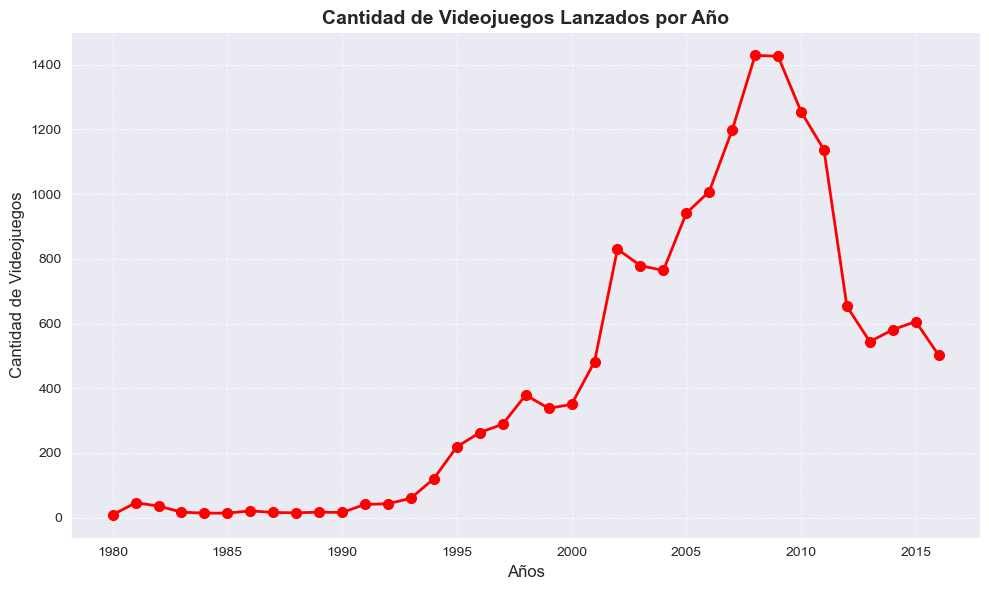

In [28]:
# Calculando la cantidad de juegos por año
juegos_por_año = df.groupby('year_of_release')['name'].count()
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))  # Ajusta el tamaño si es necesario
juegos_por_año.plot(title='Cantidad de videojuegos lanzados a través de los años', color='red', marker='o', linewidth=2, markersize=7)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Cantidad de Videojuegos', fontsize=12)
plt.title('Cantidad de Videojuegos Lanzados por Año', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



Durante la década de 1980 hasta mediados de la década de 1990, se observa una modesta actividad en el mercado, con el número de lanzamientos fluctuando entre aproximadamente 10 y 200 juegos anuales. Sin embargo, a partir de mediados de la década de 1990 y hasta principios de la década de 2000, se experimenta un notable aumento en la producción de juegos, alcanzando su punto máximo alrededor de 2002. Posteriormente, durante la década de 2000 hasta la de 2010, el número de lanzamientos se mantiene consistentemente alto, generalmente por encima de los 500 por año, con algunos años destacando por encima de otros. A partir de 2012, se observa una tendencia a la baja en los lanzamientos, aunque aún se mantiene un número significativo de juegos.





#### Variación de las ventas por plataforma


In [29]:
sales_per_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
sales_per_platform

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [30]:
top_sales_per_platform=sales_per_platform[sales_per_platform >700]

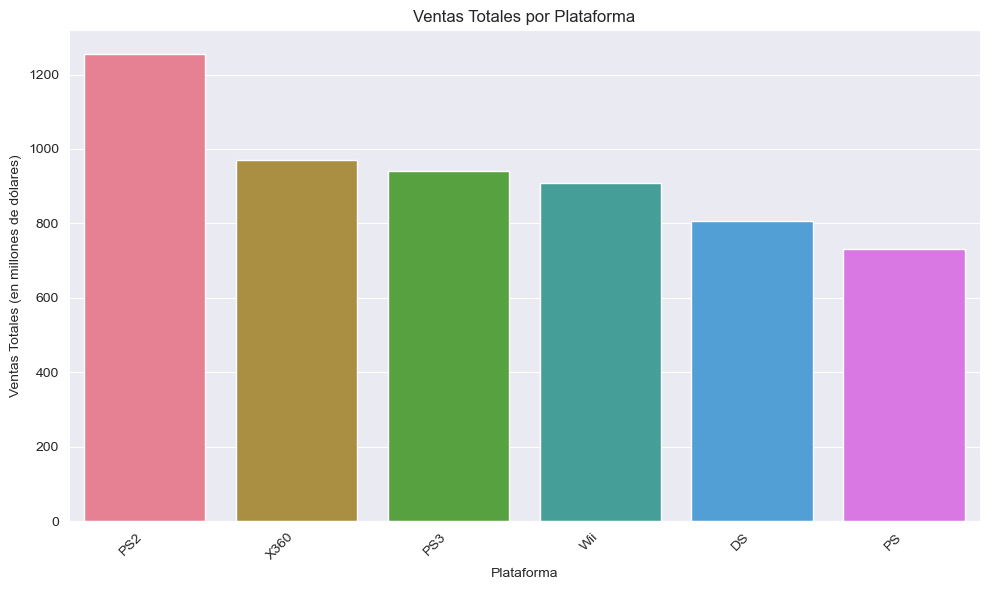

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sales_per_platform.index, y=top_sales_per_platform.values, hue=top_sales_per_platform.index, palette='husl', legend=False)
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones de dólares)')
plt.title('Ventas Totales por Plataforma')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Estos datos muestran las ventas totales (en millones de dólares) por plataforma de videojuegos. Al observar los números, podemos notar que algunas plataformas han tenido un éxito considerable en términos de ventas, con cifras que superan los mil millones de dólares, como PS2, X360 y PS3. Estas plataformas representan una parte significativa del mercado de videojuegos en términos de ventas totales.

#### Ventas a lo largo del tiempo para estas plataformas:

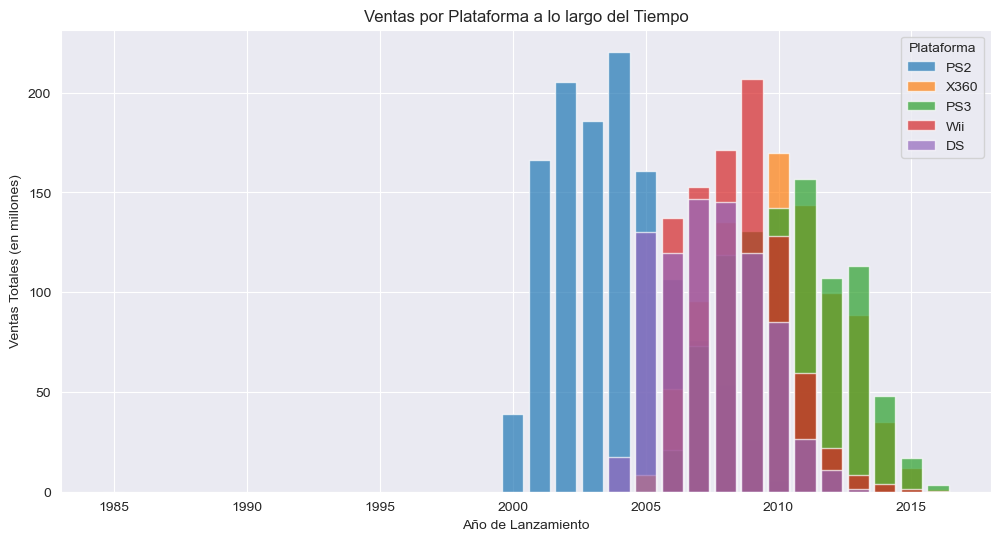

In [32]:
top_platforms = sales_per_platform.head().index.tolist()
filtered_data = df[df['platform'].isin(top_platforms)]
sales_by_platform_and_year = filtered_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
plt.figure(figsize=(12, 6))

for platform in top_platforms:
    sales = sales_by_platform_and_year[platform]
    plt.bar(sales.index, sales, label=platform, alpha=0.7) 

plt.title('Ventas por Plataforma a lo largo del Tiempo')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True)
plt.legend(title='Plataforma')
plt.show()


El análisis de las ventas de videojuegos por plataforma a lo largo del tiempo revela patrones interesantes en el desempeño de cada una. Algunas plataformas experimentan períodos de crecimiento seguidos de estancamiento, mientras que otras mantienen una estabilidad en sus ventas a lo largo del tiempo. Estas tendencias pueden ser influenciadas por factores como la llegada de nuevas tecnologías, cambios en las preferencias de los consumidores y el lanzamiento de juegos populares. Asimismo, se nota una caída en las ventas recientes, probablemente debido al surgimiento de nuevas generaciones de consolas y el aumento en la popularidad de otras formas de entretenimiento.

 #### Busca las plataformas que solían ser populares pero que ahora no tienen ventas

In [33]:
# Ventas totales por plataforma para cada año
sales_by_platform_and_year = df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

sales_by_platform_and_year

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
last_5_years = sales_by_platform_and_year.index[-5:]
recent_sales = sales_by_platform_and_year.loc[last_5_years[-1]]
oldest_sales = sales_by_platform_and_year.loc[last_5_years[0]]

# Diferencia de ventas entre el año más reciente y el año más antiguo
sales_difference = recent_sales - oldest_sales
platforms_with_decreasing_sales = sales_difference[sales_difference < 0].index.tolist()
print("Plataformas con disminución en las ventas:", platforms_with_decreasing_sales)

Plataformas con disminución en las ventas: ['3DS', 'PC', 'PS3', 'PSV', 'Wii', 'WiiU', 'X360']


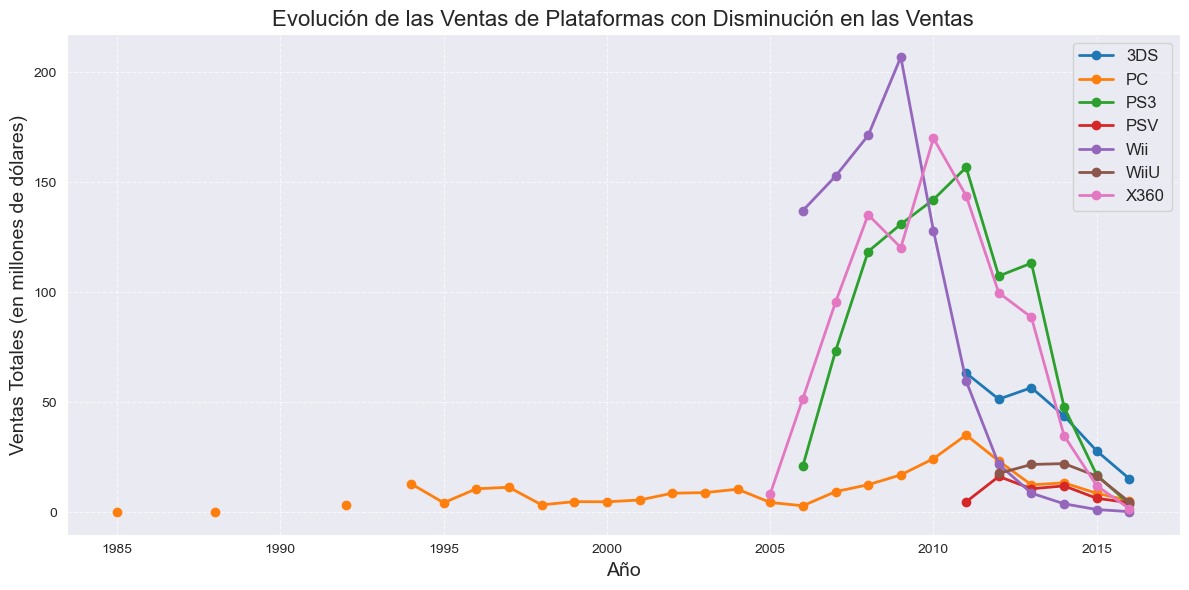

In [35]:
sns.set_style('darkgrid')

# Filtrar las ventas por plataforma para las plataformas con disminución en las ventas
sales_decreasing_platforms = sales_by_platform_and_year[platforms_with_decreasing_sales]
plt.figure(figsize=(12, 6))
for platform in platforms_with_decreasing_sales:
    plt.plot(sales_decreasing_platforms.index, sales_decreasing_platforms[platform], label=platform, linewidth=2, marker='o')
plt.title('Evolución de las Ventas de Plataformas con Disminución en las Ventas', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Ventas Totales (en millones de dólares)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


El gráfico muestra la evolución de las ventas totales de las plataformas que han experimentado una disminución en las ventas a lo largo de los últimos años. Se observa que estas plataformas mostraron altas ventas en los años anteriores y, a medida que avanzan los años, las ventas han disminuido gradualmente. Esto puede indicar un declive en la popularidad de estas plataformas o la llegada de nuevas tecnologías que han desplazado su relevancia en el mercado. Las plataformas como '3DS', 'PS3', 'Wii', 'WiiU' y 'X360' muestran tendencias decrecientes más pronunciadas en comparación con otras plataformas. 

####  ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [36]:
active_platforms_by_year = df.groupby('year_of_release')['platform'].nunique()
active_platforms_by_year

year_of_release
1980     1
1981     1
1982     1
1983     2
1984     2
1985     4
1986     2
1987     2
1988     4
1989     3
1990     4
1991     4
1992     6
1993     5
1994    10
1995     8
1996     8
1997     6
1998     7
1999     8
2000     9
2001    10
2002     8
2003     6
2004     7
2005     8
2006    10
2007    11
2008     9
2009     7
2010     7
2011     9
2012     9
2013    11
2014    10
2015    10
2016     9
Name: platform, dtype: int64

In [37]:

peaks = active_platforms_by_year[active_platforms_by_year.diff() > 0]
valleys = active_platforms_by_year[active_platforms_by_year.diff() < 0]
launch_periods = []
decline_periods = []
current_period = []

for year in active_platforms_by_year.index:
    if year in peaks.index:
        if current_period and current_period[-1] in valleys.index:
            decline_periods.append(current_period)
            current_period = []
        current_period.append(year)
    elif year in valleys.index:
        if current_period and current_period[-1] in peaks.index:
            launch_periods.append(current_period)
            current_period = []
        current_period.append(year)


if current_period:
    if current_period[-1] in peaks.index:
        launch_periods.append(current_period)
    elif current_period[-1] in valleys.index:
        decline_periods.append(current_period)

average_launch_period = sum(len(period) for period in launch_periods) / len(launch_periods)
average_decline_period = sum(len(period) for period in decline_periods) / len(decline_periods)

average_launch_period_rounded = round(average_launch_period, 2)

print("Período promedio de lanzamiento:", average_launch_period_rounded, "años")
print("Período promedio de declive:", average_decline_period, "años")


Período promedio de lanzamiento: 2.29 años
Período promedio de declive: 1.5714285714285714 años


Se calculó el número de plataformas activas en cada año desde el año mínimo hasta el año máximo en que se lanzaron juegos. Luego, graficamos la cantidad de plataformas activas por año para visualizar las tendencias a lo largo del tiempo. Posteriormente, identificamos los años que marcan los picos y valles en la cantidad de plataformas activas, lo que indica períodos de lanzamiento y declive respectivamente. Agrupamos los años consecutivos en estos períodos y calculamos la duración promedio de los períodos de lanzamiento y declive. En este caso, encontramos que el período promedio de lanzamiento es de aproximadamente 2.3 años, mientras que el período promedio de declive es de 1.5 años.


### Periodo relevante datos, que permiten construir un modelo para 2017
Utilizaremos datos de juegos lanzados desde principios de la década de 2006 hasta 2016 para construir nuestro modelo predictivo para 2017.Esto debido a que despues del 2005 hubo un incremento considerable en nuevas consolas y mas videojuegos. 



In [38]:
model_2017 = df[df['year_of_release'] >= 2006]

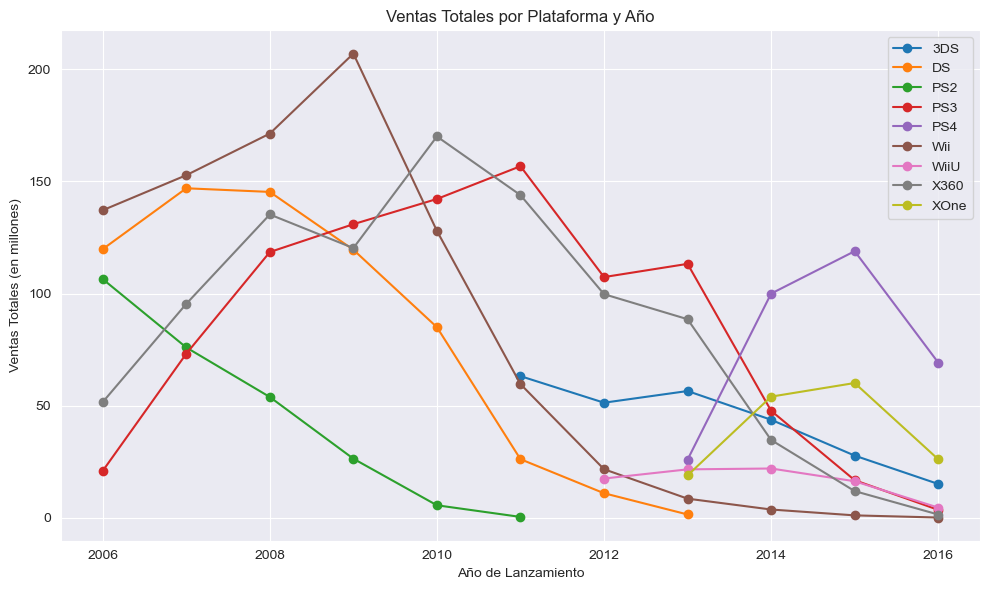

In [39]:
games_2017_sales = model_2017.groupby('platform')['total_sales'].mean()
games_2017_sales = games_2017_sales[games_2017_sales >0.3]
games_list_2017 = ['3DS', 'DS', 'PS3', 'PS4', 'PS2', 'Wii', 'WiiU', 'X360', 'XOne']
top_platforms_2017 = model_2017.loc[model_2017['platform'].isin(games_list_2017)]


def calculate_platform_sales(dataframe, platforms):
    platform_sales = {}
    for platform in platforms:
        platform_sales[platform] = dataframe[dataframe['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    return platform_sales

# Uso de la función
platforms = ['3DS', 'DS', 'PS2', 'PS3', 'PS4', 'Wii', 'WiiU', 'X360', 'XOne']
platform_sales = calculate_platform_sales(top_platforms_2017, platforms)

# Crear la gráfica de líneas
plt.figure(figsize=(10, 6))
for platform, sales in platform_sales.items():
    plt.plot(sales.index, sales.values, label=platform, marker='o')

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (en millones)')
plt.title('Ventas Totales por Plataforma y Año')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
PS3, PS4 y X360. Las que crecen aparentemente son PS4 y XOne, y las que disminuyen son todas las demás, sin embargo hay que considerar que no tenemos datos del 2017, año en el cual fue lanzado el Nintendo Switch y ha tenido grandes ventas en los últimos años. 

#### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma

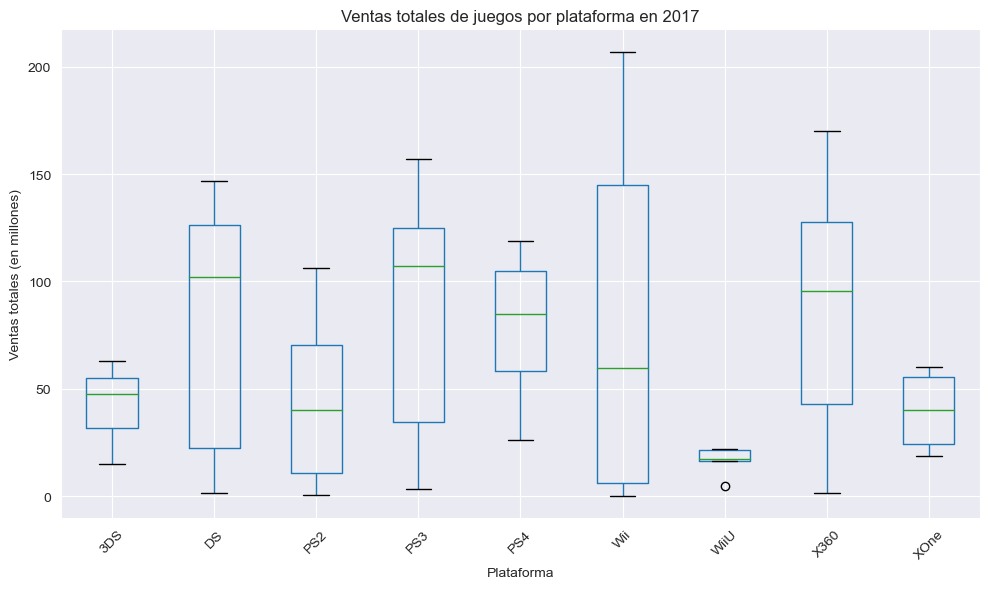

In [40]:
import matplotlib.pyplot as plt

# Convertir el diccionario de ventas por plataforma en un DataFrame
platform_sales_df = pd.DataFrame(platform_sales)

# Crear el gráfico boxplot
plt.figure(figsize=(10, 6))
platform_sales_df.boxplot()
plt.title('Ventas totales de juegos por plataforma en 2017')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (en millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()





#### ¿Son significativas las diferencias en las ventas?
Sí, podemos observar a simple vista que las ventas de DS, PS3, Wi son mucho mayores en comparación a las ventas de otras plataformas. 


####  Reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (PS4)


In [41]:
#Hacemos un filtrado de los juegos para la plataforma PS4
ps4 = df[df['platform'] == 'PS4']
ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,año_extraido,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,NaN,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,NaN,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,NaN,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16498,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,NaN,0.01
16501,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01
16524,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,NaN,0.01
16528,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,NaN,0.01


In [42]:
# Convertir las columnas de reseñas a tipo numérico
ps4.loc[:, 'user_score'] = pd.to_numeric(ps4['user_score'], errors='coerce')
ps4.loc[:, 'critic_score'] = pd.to_numeric(ps4['critic_score'], errors='coerce')

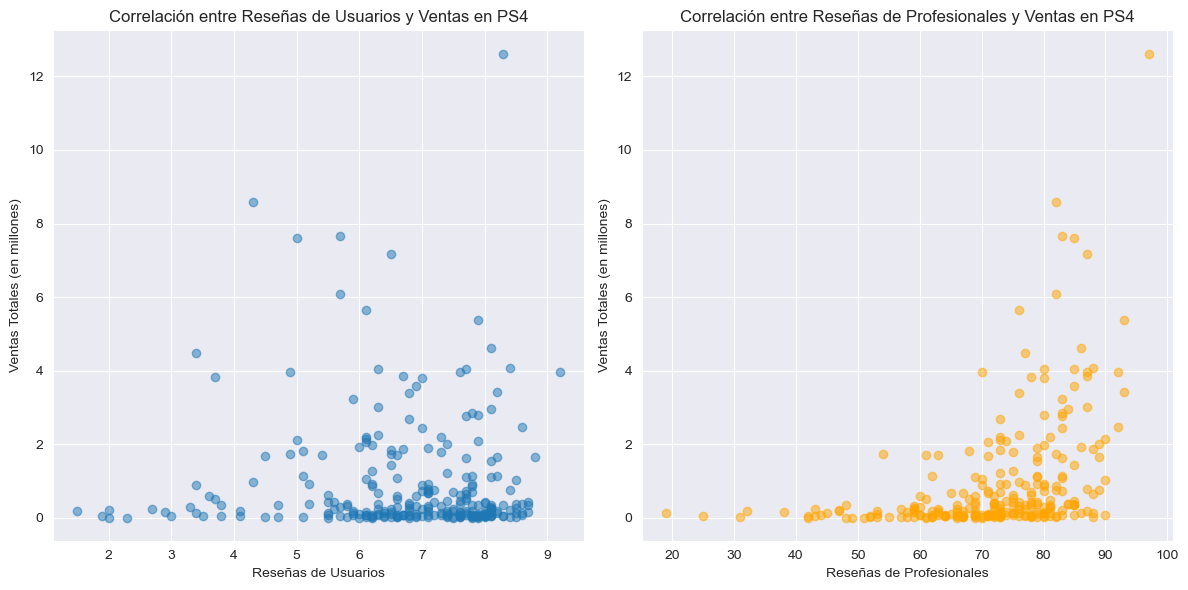

In [43]:
# Crear el gráfico de dispersión para las reseñas de usuarios
plt.figure(figsize=(12, 6))

# Gráfico para las reseñas de usuarios
plt.subplot(1, 2, 1)
plt.scatter(ps4['user_score'], ps4['total_sales'], alpha=0.5)
plt.title('Correlación entre Reseñas de Usuarios y Ventas en PS4')
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True)

# Gráfico para las reseñas de profesionales
plt.subplot(1, 2, 2)
plt.scatter(ps4['critic_score'], ps4['total_sales'], color='orange', alpha=0.5)
plt.title('Correlación entre Reseñas de Profesionales y Ventas en PS4')
plt.xlabel('Reseñas de Profesionales')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True)

plt.tight_layout()
plt.show()


In [44]:
# Calcular la correlación entre las reseñas de usuarios y las ventas totales para la plataforma PS4
correlation_ps4_user = ps4['user_score'].corr(ps4['total_sales'])
print("Correlación entre Reseñas de Usuarios y Ventas en la plataforma PS4:", correlation_ps4_user)

# Calcular la correlación entre las reseñas de profesionales y las ventas totales para la plataforma PS4
correlation_ps4_critic = ps4['critic_score'].corr(ps4['total_sales'])
print("Correlación entre Reseñas de Profesionales y Ventas en la plataforma PS4:", correlation_ps4_critic)

Correlación entre Reseñas de Usuarios y Ventas en la plataforma PS4: -0.03195711020455644
Correlación entre Reseñas de Profesionales y Ventas en la plataforma PS4: 0.40656790206178123


La correlación entre las reseñas de usuarios y las ventas resultó ser negativa y muy baja (-0.032), lo que sugiere una relación insignificante entre estos dos factores en la plataforma PS4. En contraste, la correlación entre las reseñas de profesionales y las ventas fue positiva y moderadamente fuerte (0.407), indicando una asociación más sólida entre las reseñas de profesionales y las ventas totales en la misma plataforma.

Estos hallazgos resaltan la importancia de las reseñas de profesionales en el rendimiento de las ventas de los juegos en la plataforma PS4, mientras que las reseñas de usuarios parecen tener una influencia limitada. Este análisis proporciona una comprensión más profunda de cómo las opiniones de profesionales y usuarios afectan las ventas de los juegos en la plataforma PS4, lo que puede ser útil para desarrolladores y empresas en la toma de decisiones relacionadas con la comercialización y la calidad del juego."

Correlación entre Reseñas de Usuarios y Ventas en la plataforma Xbox One: -0.06892505328279418
Correlación entre Reseñas de Profesionales y Ventas en la plataforma Xbox One: 0.41699832800840153


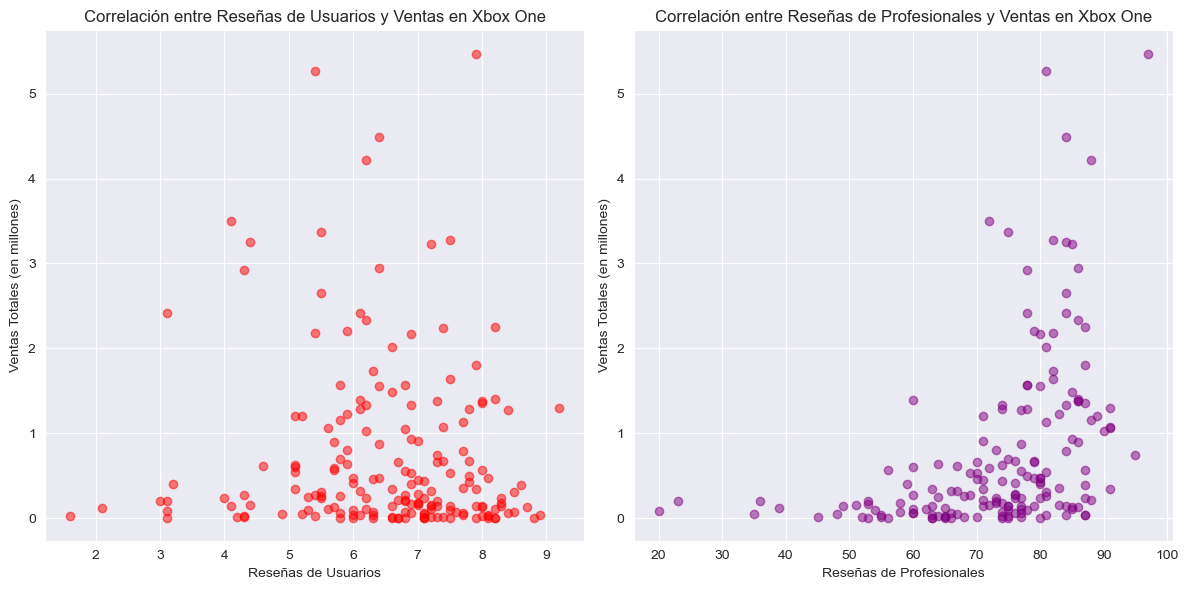

In [49]:
# Filtrar los datos para la plataforma Xbox One
xbox_one = df[df['platform'] == 'XOne'].copy()

# Convertir las columnas de reseñas a tipo numérico
xbox_one.loc[:, 'user_score'] = pd.to_numeric(xbox_one['user_score'], errors='coerce')
xbox_one.loc[:, 'critic_score'] = pd.to_numeric(xbox_one['critic_score'], errors='coerce')

# Calcular la correlación entre las reseñas de usuarios y las ventas totales para la plataforma Xbox One
correlation_xbox_one_user = xbox_one['user_score'].corr(xbox_one['total_sales'])
print("Correlación entre Reseñas de Usuarios y Ventas en la plataforma Xbox One:", correlation_xbox_one_user)

# Calcular la correlación entre las reseñas de profesionales y las ventas totales para la plataforma Xbox One
correlation_xbox_one_critic = xbox_one['critic_score'].corr(xbox_one['total_sales'])
print("Correlación entre Reseñas de Profesionales y Ventas en la plataforma Xbox One:", correlation_xbox_one_critic)

# Crear el gráfico de dispersión para las reseñas de usuarios
plt.figure(figsize=(12, 6))

# Gráfico para las reseñas de usuarios
plt.subplot(1, 2, 1)
plt.scatter(xbox_one['user_score'], xbox_one['total_sales'], color='red', label='Xbox One', alpha=0.5)
plt.title('Correlación entre Reseñas de Usuarios y Ventas en Xbox One')
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True)

# Gráfico para las reseñas de profesionales
plt.subplot(1, 2, 2)
plt.scatter(xbox_one['critic_score'], xbox_one['total_sales'], color='purple', label='Xbox One', alpha=0.5)
plt.title('Correlación entre Reseñas de Profesionales y Ventas en Xbox One')
plt.xlabel('Reseñas de Profesionales')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True)

plt.tight_layout()
plt.show()

Al analizar las correlaciones entre las reseñas de usuarios y profesionales con las ventas totales en las plataformas PS4 y Xbox One, así como comparar las ventas y las reseñas entre ambas plataformas, se observan tendencias interesantes.

Para la plataforma PS4, la correlación entre las reseñas de usuarios y las ventas totales es de aproximadamente -0.032, indicando una correlación débilmente negativa. Por otro lado, la correlación entre las reseñas de profesionales y las ventas totales es de aproximadamente 0.407, lo que muestra una correlación moderadamente positiva.

En el caso de Xbox One, la correlación entre las reseñas de usuarios y las ventas totales es de aproximadamente -0.069, también sugiriendo una correlación débilmente negativa. Mientras tanto, la correlación entre las reseñas de profesionales y las ventas totales es de aproximadamente 0.417, lo que indica una correlación moderadamente positiva.

Al comparar las ventas y las reseñas de usuarios entre PS4 y Xbox One, se observa una distribución similar en los gráficos de dispersión, con una dispersión de puntos comparable. Esto sugiere una consistencia en la relación entre las reseñas de usuarios y las ventas totales entre ambas plataformas.

En cuanto a la comparación entre las reseñas de usuarios y profesionales, en ambas plataformas, las reseñas de profesionales muestran una correlación más fuerte con las ventas totales que las reseñas de usuarios. Esto sugiere que las opiniones de los críticos profesionales pueden tener un impacto más significativo en las decisiones de compra de los usuarios que las reseñas de otros usuarios.

#### Echa un vistazo a la distribución general de los juegos por género

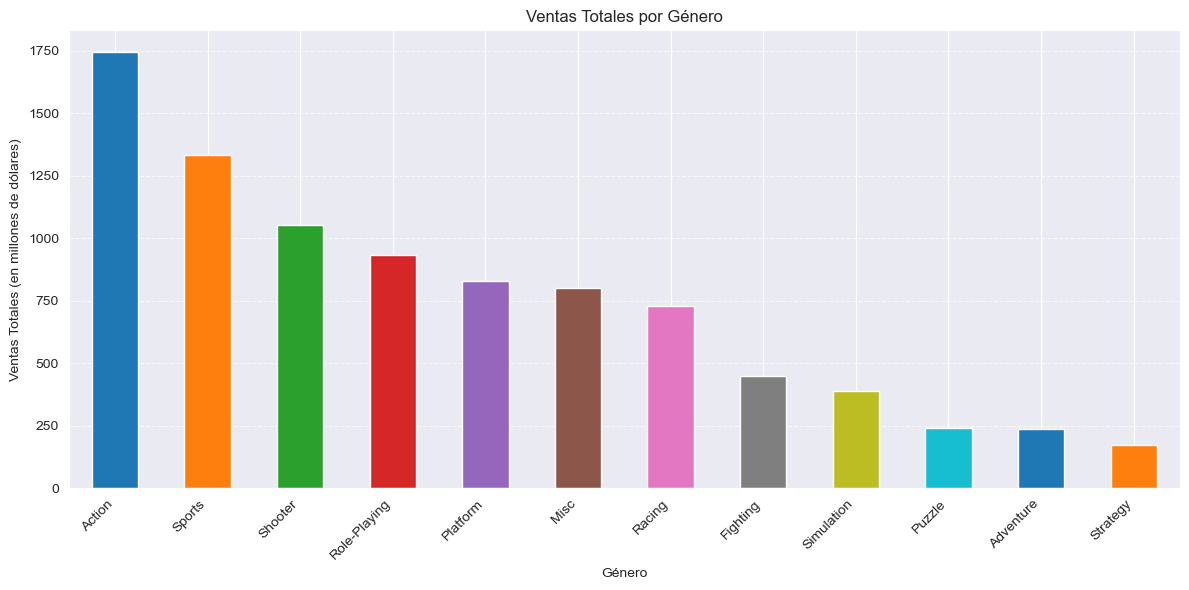

In [53]:
# Calcular las ventas totales por género
total_sales_per_genre = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Crear una paleta de colores personalizada con un color diferente para cada género
colors = sns.color_palette("tab10", len(total_sales_per_genre))

# Visualizar la distribución de las ventas por género con colores personalizados
plt.figure(figsize=(12, 6))
total_sales_per_genre.plot(kind='bar', color=colors)
plt.title('Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico de barras presenta las ventas totales de juegos desglosadas por género. Destaca que el género de acción lidera con ventas superiores a los 1700 millones de dólares, indicando una alta demanda y popularidad entre los jugadores. Le sigue de cerca el género de deportes, con ventas que superan los 1300 millones de dólares, lo que sugiere una amplia aceptación entre los entusiastas de los videojuegos.

Además, los géneros de shooter y juegos de rol ocupan el tercer y cuarto lugar respectivamente en términos de ventas totales, mostrando que también gozan de una considerable base de seguidores. Por otro lado, los géneros de estrategia y aventura muestran las ventas más bajas en comparación con otros géneros, lo que sugiere una menor demanda o interés por parte de los jugadores en estos tipos de juegos.

## Creación de Perfiles de Usuario por Región

En esta sección nos permitirá comprender mejor las distintas regiones , nos enfocaremos en analizar las preferencias de los usuarios en diferentes regiones, centrándonos en las plataformas de juegos más populares, los géneros de juegos preferidos y cómo afectan las clasificaciones ESRB a las ventas en cada región. 

### Perfil de Usuario para Norteamérica (NA)    

In [55]:
# Filtrar los datos para Norteamérica (NA)
na_data = df[df['na_sales'] > 0]

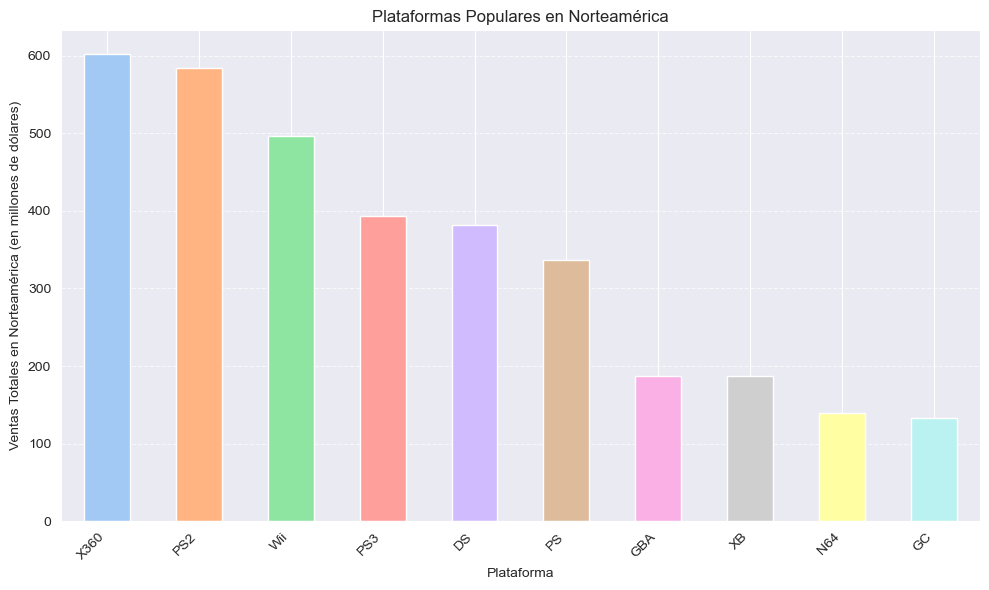

In [56]:
# Plataformas Populares en Norteamérica
plt.figure(figsize=(10, 6))
na_platforms = na_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette('pastel', len(na_platforms))
na_platforms.plot(kind='bar', color=colors)
plt.title('Plataformas Populares en Norteamérica')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales en Norteamérica (en millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico ilustra las principales plataformas de videojuegos en Norteamérica, evaluadas según sus ventas totales. Destacan tres plataformas: Xbox 360, PlayStation 2 y Wii, que dominan el mercado durante el período analizado. Estos datos reflejan una preferencia sólida por los sistemas de juego de Microsoft y Sony, junto con un interés continuo en la consola de Nintendo. Esta tendencia sugiere una fuerte presencia de estas marcas en el mercado norteamericano de videojuegos, delineando así el panorama competitivo de la industria en la región.

#### Géneros Populares en Norteamérica

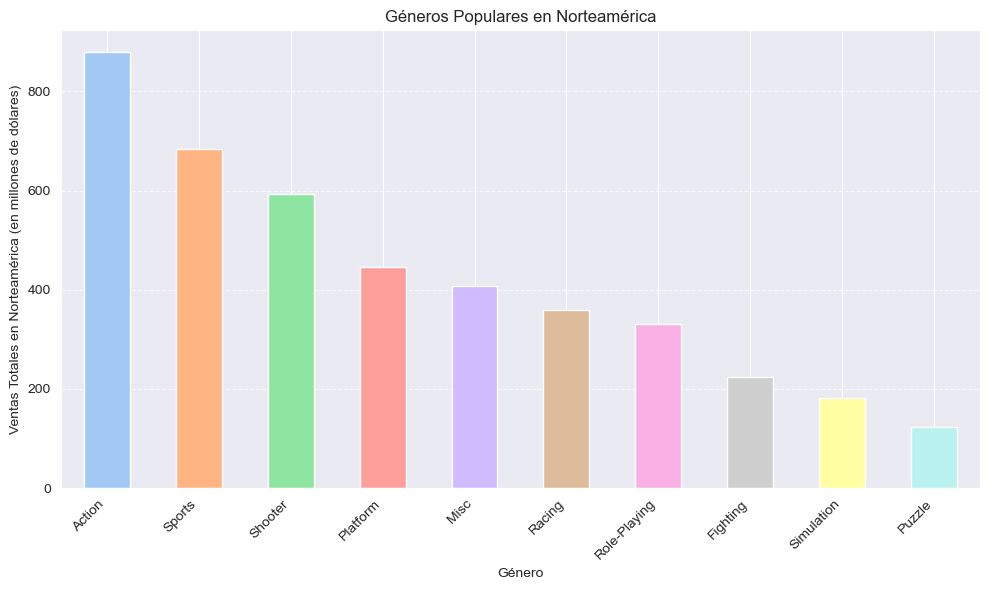

In [57]:
# Géneros Populares en Norteamérica
plt.figure(figsize=(10, 6))
na_genres = na_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette('pastel', len(na_genres))
na_genres.plot(kind='bar', color=colors)
plt.title('Géneros Populares en Norteamérica')
plt.xlabel('Género')
plt.ylabel('Ventas Totales en Norteamérica (en millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico presenta los géneros de videojuegos más destacados en Norteamérica en términos de ventas totales. Los géneros más populares en esta región son Acción, Deportes y Disparos (Shooter), lo que sugiere una inclinación hacia experiencias de juego emocionantes y competitivas. Además, los géneros de Plataforma y Carreras también disfrutan de una presencia significativa en el mercado, reflejando así la diversidad de preferencias de los jugadores en la región. Estos datos proporcionan una visión esclarecedora de las tendencias y demandas del mercado de videojuegos en Norteamérica.

####  Impacto de las Clasificaciones ESRB en las Ventas en Norteamérica

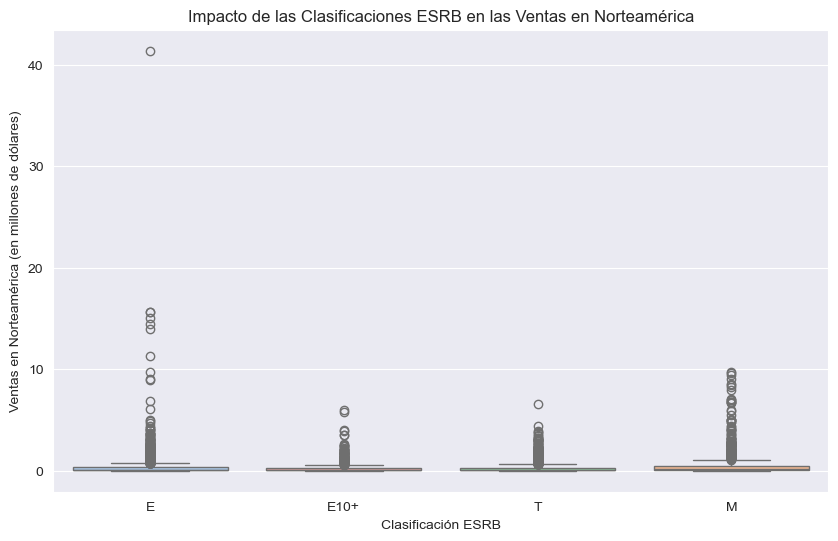

In [74]:
# Impacto de las Clasificaciones ESRB en las Ventas en Norteamérica
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='na_sales', data=na_data, order=['E', 'E10+', 'T', 'M'], palette='pastel', hue='rating', legend=False)
plt.title('Impacto de las Clasificaciones ESRB en las Ventas en Norteamérica')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas en Norteamérica (en millones de dólares)')
plt.show()


La gráfica de caja muestra el impacto de las clasificaciones ESRB (E, E10+, T, M) en las ventas de videojuegos en Norteamérica. Se observa claramente que los juegos con clasificaciones "E" (para todos) y "E10+" (mayores de 10 años) tienden a tener ventas más altas, mientras que los juegos con clasificaciones "M" (maduro) muestran ventas más bajas en comparación. Estos hallazgos sugieren que los juegos dirigidos a audiencias más jóvenes disfrutan de un mayor éxito comercial en el mercado norteamericano de videojuegos. Esta información es valiosa para comprender las preferencias de los consumidores y la dinámica del mercado en la región de Norteamérica.

### Perfil de Usuario para Europa (EU)  

In [59]:
# Filtrar los datos para Europa (EU)
eu_data = df[df['eu_sales'] > 0]


#### Plataformas Populares en Europa

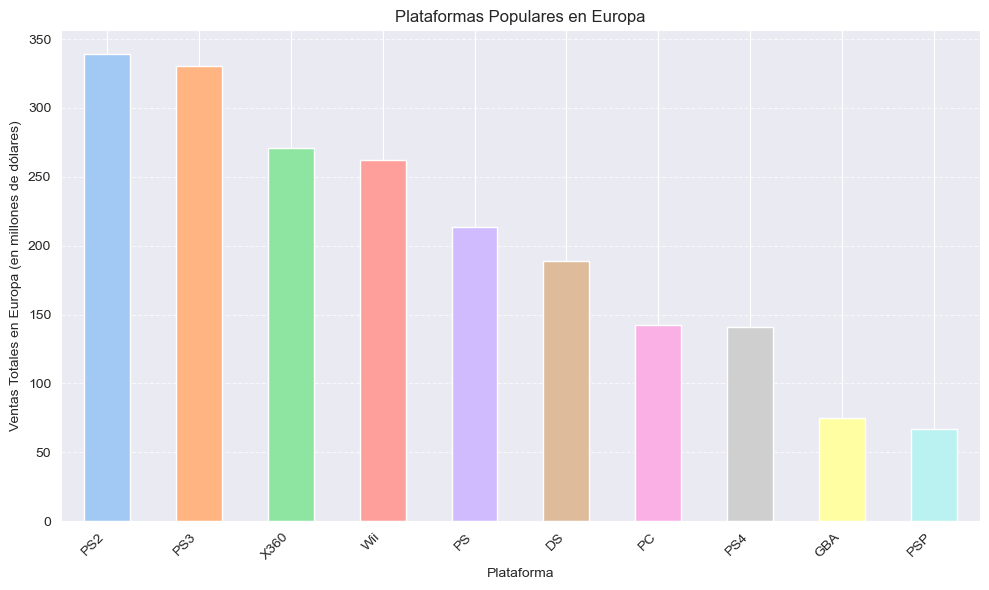

In [60]:
# Plataformas Populares en Europa
plt.figure(figsize=(10, 6))
eu_platforms = eu_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette('pastel', len(eu_platforms))
eu_platforms.plot(kind='bar', color=colors)
plt.title('Plataformas Populares en Europa')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales en Europa (en millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico exhibe las plataformas de videojuegos más prominentes en Europa en términos de ventas totales. Estos datos revelan  una preferencia destacada por las consolas de Microsoft y Sony. Además, la persistente popularidad de PlayStation 2 sugiere una presencia continua y significativa en el mercado europeo de videojuegos, incluso en años más recientes. 

#### Géneros Populares en Europa

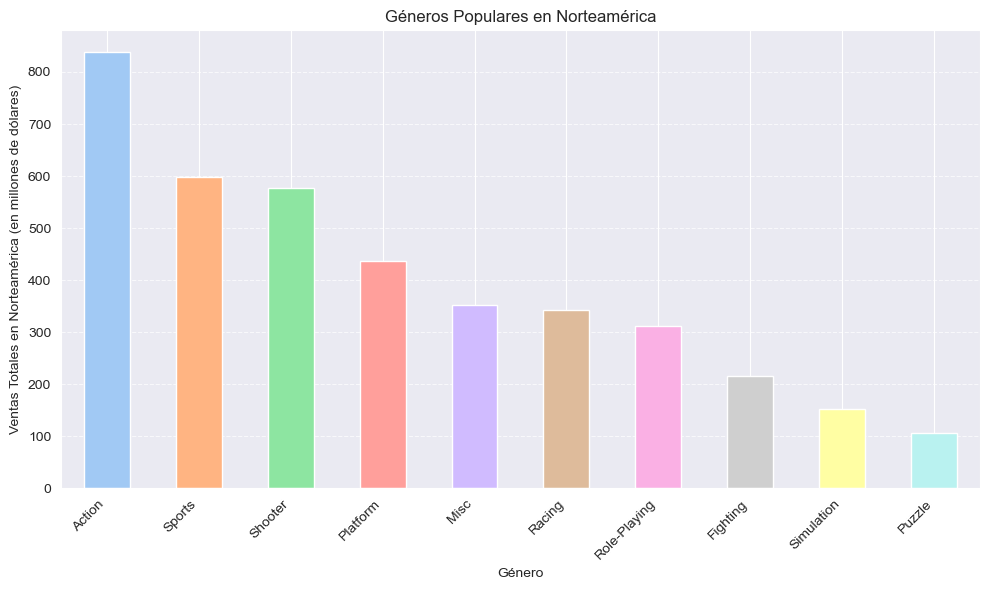

In [78]:
# Géneros Populares en Norteamérica
plt.figure(figsize=(10, 6))
na_genres = _data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette('pastel', len(na_genres))
na_genres.plot(kind='bar', color=colors)
plt.title('Géneros Populares en Norteamérica')
plt.xlabel('Género')
plt.ylabel('Ventas Totales en Norteamérica (en millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico exhibe los géneros de videojuegos más destacados en Europa en términos de ventas totales. Al igual que en Norteamérica, los géneros más populares en Europa son Acción, Deportes y Disparos (Shooter), lo que sugiere una preferencia similar entre los jugadores de ambas regiones por experiencias de juego emocionantes y competitivas. Sin embargo, se observa que la presencia de géneros como Plataforma y Carreras es relativamente menor en Europa en comparación con Norteamérica. Estos datos proporcionan una visión esclarecedora de las preferencias de los jugadores en el mercado de videojuegos europeo, destacando tanto las similitudes como las diferencias con el mercado norteamericano.

#### Impacto de las Clasificaciones ESRB en las Ventas en Europa

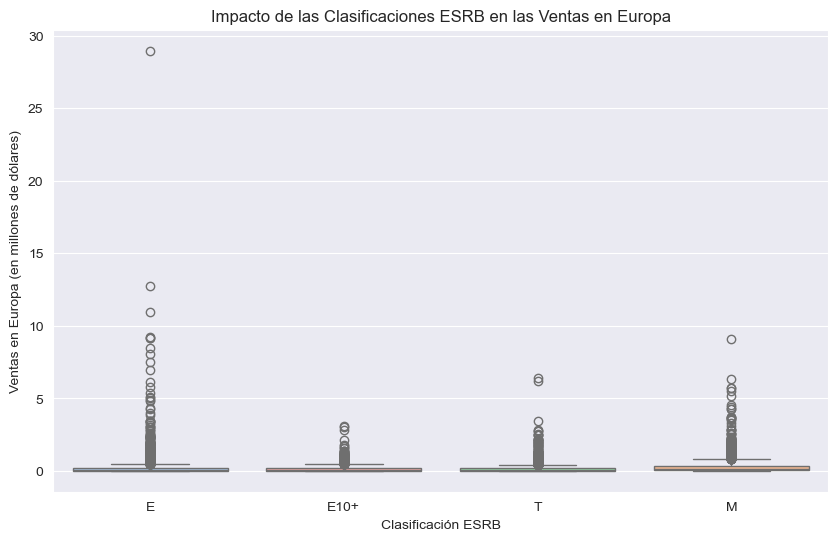

In [77]:
# Impacto de las Clasificaciones ESRB en las Ventas en Europa
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='eu_sales', data=eu_data, order=['E', 'E10+', 'T', 'M'], hue='rating', palette='pastel', legend=False)
plt.title('Impacto de las Clasificaciones ESRB en las Ventas en Europa')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas en Europa (en millones de dólares)')
plt.show()



"El gráfico muestra el impacto de las clasificaciones ESRB en las ventas de videojuegos en Europa. Similar a lo observado en Norteamérica, se aprecia que los juegos con clasificaciones "E" (para todos) y "E10+" (mayores de 10 años) exhiben un rango intercuartil más amplio y, en general, mayores ventas en comparación con los juegos clasificados como "T" (adolescentes) y "M" (maduro). Este patrón sugiere una tendencia consistente en Europa, donde los juegos diseñados para un público más amplio disfrutan de un mayor éxito en términos de ventas. Estos resultados proporcionan información valiosa sobre las preferencias de los consumidores en el mercado de videojuegos europeo."

### Perfil de Usuario para Japón (JP)

In [63]:
# Filtrar los datos para Japón (JP)
jp_data = df[df['jp_sales'] > 0]

#### Plataformas Populares en Japón

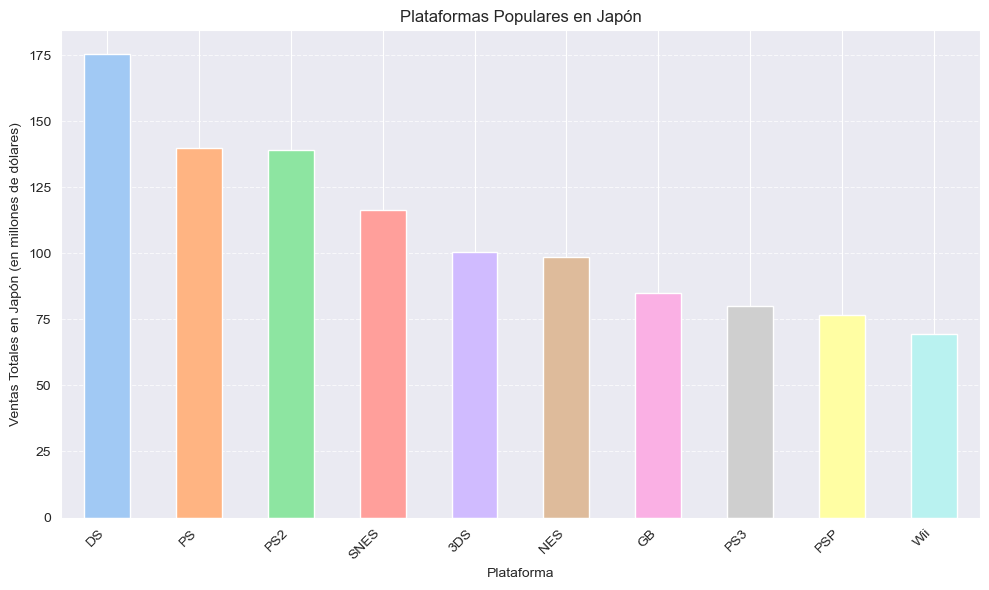

In [64]:
# Plataformas Populares en Japón
plt.figure(figsize=(10, 6))
jp_platforms = jp_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette('pastel', len(jp_platforms))
jp_platforms.plot(kind='bar', color=colors)
plt.title('Plataformas Populares en Japón')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales en Japón (en millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico muestra las plataformas de videojuegos más destacadas en Japón en términos de ventas totales. En contraste con Norteamérica y Europa, donde las consolas de sobremesa dominan el mercado, en Japón se observa una preferencia notable por las consolas portátiles de Nintendo, como Nintendo DS y Nintendo 3DS. Además, PlayStation 2 también figura entre las plataformas más populares en Japón, lo que sugiere una inclinación hacia las consolas de Sony en esta región. La presencia significativa de PlayStation Portable (PSP) y PlayStation 3 también refleja la fuerte influencia de Sony en el mercado japonés de videojuegos. Estos datos proporcionan una visión esclarecedora de las preferencias de los consumidores en el mercado japonés de videojuegos y destacan las diferencias en comparación con otras regiones del mundo.

#### Géneros Populares en Japón

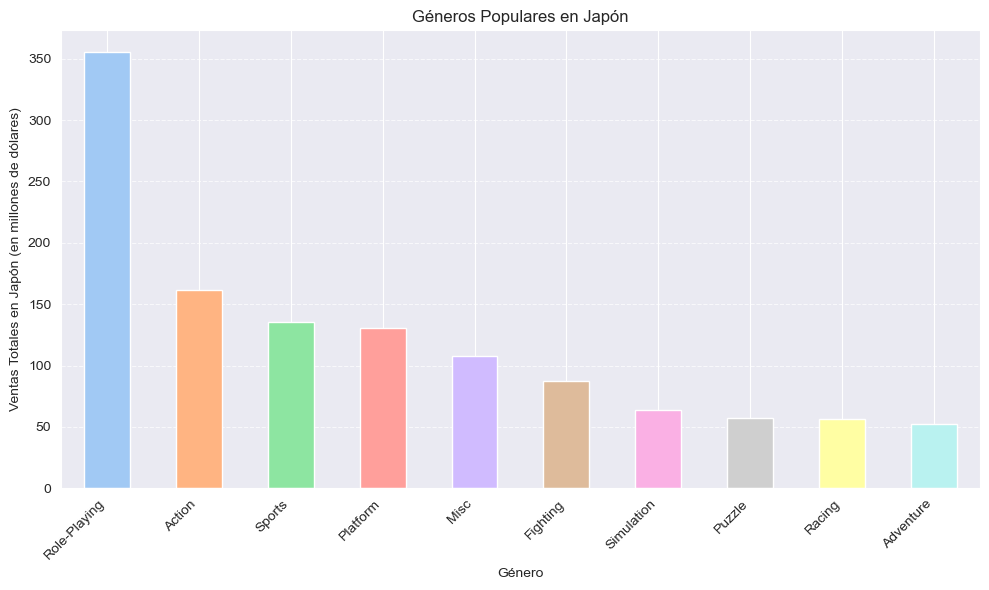

In [65]:
# Géneros Populares en Japón
plt.figure(figsize=(10, 6))
jp_genres = jp_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette('pastel', len(jp_genres))
jp_genres.plot(kind='bar', color=colors)
plt.title('Géneros Populares en Japón')
plt.xlabel('Género')
plt.ylabel('Ventas Totales en Japón (en millones de dólares)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico muestra los géneros de videojuegos más destacados en Japón en términos de ventas totales. En contraste con Norteamérica y Europa, donde los géneros más populares suelen ser Acción y Deportes, en Japón destacan los géneros de Rol-Playing y Acción, seguidos de cerca por Plataforma y Miscelánea (Misc). Esta preferencia por los juegos de rol y acción refleja los gustos únicos de los jugadores japoneses, quienes suelen valorar las narrativas profundas y la jugabilidad estratégica. Además, la presencia de géneros como Puzzle y Aventura indica una diversidad en las preferencias de los jugadores japoneses, lo que contribuye a un mercado de videojuegos vibrante y variado en esta región.

#### Impacto de las Clasificaciones ESRB en las Ventas en Japón

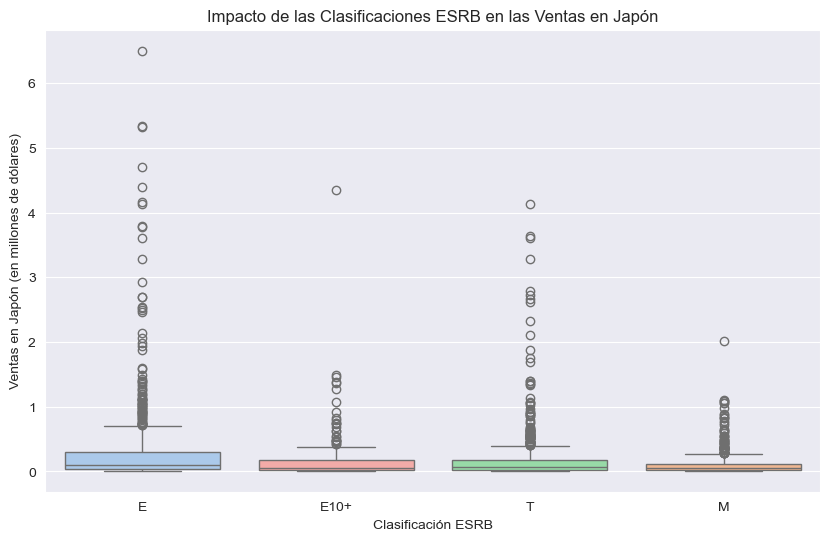

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='jp_sales', data=jp_data, order=['E', 'E10+', 'T', 'M'], hue='rating', palette='pastel', legend=False)
plt.title('Impacto de las Clasificaciones ESRB en las Ventas en Japón')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas en Japón (en millones de dólares)')
plt.show()


El gráfico muestra el impacto de las clasificaciones ESRB en las ventas de videojuegos en Japón. Contrario a lo observado en Norteamérica y Europa, donde las clasificaciones "E" (para todos) y "E10+" (mayores de 10 años) suelen tener un mejor desempeño en términos de ventas, en Japón estos juegos muestran un rendimiento similar a los juegos clasificados como "T" (adolescentes) y "M" (maduro). Esto sugiere que las clasificaciones ESRB pueden tener menos influencia en las decisiones de compra de los consumidores japoneses en comparación con otras regiones. Es posible que otros factores, como el género del juego o la reputación de la marca, tengan un impacto más significativo en las ventas en el mercado japonés de videojuegos. Estos datos ofrecen una perspectiva interesante sobre las dinámicas del mercado de videojuegos en Japón y resaltan la importancia de considerar los factores culturales y regionales al analizar las ventas de videojuegos.

### Paso 5. Prueba las siguientes hipótesis:

H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

H1: Las calificaciónes promedio de los usuarios para las plataformas XOne y PC son diferentes.

In [72]:
score_xone = df[df['platform'] == 'XOne']['user_score'].dropna()
score_pc = df[df['platform'] == 'PC']['user_score'].dropna()
#establecemos el nivel de significancia alpha
alpha = 0.05
#realizamos una t de student puesto que desconocemos las varianzas de cada muestra
#equal_var lo ponemos como False ya que asumimos que son varianzas diferentes para cada muestra
results_platforms = st.ttest_ind(score_xone, score_pc, equal_var = False)
print(f"""
La calificación promedio de usuarios para Xbox One es: {score_xone.mean()}
La calificación promedio de usuarios para PC: {score_pc.mean()}
t-statistic: {results_platforms.statistic}
p-value: {results_platforms.pvalue} 
""")

if results_platforms.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se puede rechazar la hipótesis nula')


La calificación promedio de usuarios para Xbox One es: 6.521428571428572
La calificación promedio de usuarios para PC: 7.062467532467533
t-statistic: -4.653422798410771
p-value: 4.935072360183574e-06 

Se rechaza la hipótesis nula


En este caso aceptamos la hipótesis alternativa: Las calificaciónes promedio de los usuarios para las plataformas XOne y PC son diferentes

H0 : Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

H1 : Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


In [73]:
score_action = df[df['genre'] == 'Action']['user_score'].dropna()
score_sports = df[df['genre'] == 'Sports']['user_score'].dropna()
#establecemos el nivel de significancia alpha
alpha = 0.05
#realizamos una t de student puesto que desconocemos las varianzas de cada muestra
#equal_var lo ponemos como False ya que asumimos que son varianzas diferentes
results_genre = st.ttest_ind(score_action, score_sports, equal_var = False)
print(f"""
La calificación promedio de usuarios para el género acción: {score_action.mean()}
La calificación promedio de usuarios para el género sports: {score_sports.mean()}
t-statistic: {results_genre.statistic}
p-value: {results_genre.pvalue} 
""")

if results_genre.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se puede rechazar la hipótesis nula')


La calificación promedio de usuarios para el género acción: 7.054043715846995
La calificación promedio de usuarios para el género sports: 6.961196736174069
t-statistic: 1.57746791633354
p-value: 0.11483818791498286 

No se puede rechazar la hipótesis nula


En este caso aceptamos la H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

### Paso 6. Escribe una conclusión general

El análisis revela tendencias y patrones de ventas en la industria de los videojuegos.
Se identifican variaciones significativas en las calificaciones de usuarios entre diferentes plataformas y géneros de videojuegos.
Recomendaciones para la industria en 2017 incluyen priorizar la calidad sobre la cantidad, adaptarse ágilmente a nuevas plataformas y tecnologías, y mantenerse receptivos a la retroalimentación de los usuarios.
Se sugiere explorar nuevas ideas dentro de géneros establecidos para mantener la relevancia y competitividad en un mercado en constante cambio.
Mantenerse al tanto de las últimas tendencias y tecnologías garantizará una posición sólida y ventajosa en el dinámico mundo de los videojuegos.